In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import nltk.classify.util
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [144]:
review = pd.read_csv("C:/Users/sathishkumar/Desktop/Term 3 Project/sentimental_analysis.csv")
review.head()

C:\Users\sathishkumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [145]:
print(review.dtypes)
print(review.shape)

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object
(34660, 21)


In [146]:
# droped columns that are least imporatnt
df = review[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
df.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [147]:
#checking if there are any null values
print(df.isnull().sum())

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


In [148]:
#drop null values from reviewss.rating
df_1= df[df["reviews.rating"].notnull()]
df_1.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [149]:
print(df_1.isnull().sum())

reviews.rating      0
reviews.text        1
reviews.title       5
reviews.username    2
dtype: int64


In [150]:
#classifying the text as Positive and Negative
df_1["senti"] = df_1["reviews.rating"]>=4
df_1["senti"] = df_1["senti"].replace([True , False] , ["positive" , "negative"])

C:\Users\sathishkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sathishkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


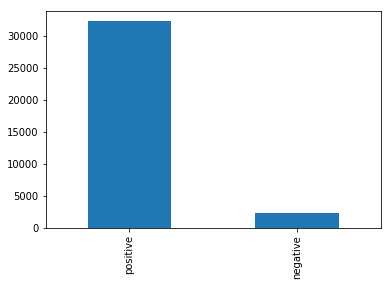

In [151]:
df_1["senti"].value_counts().plot.bar()

In [152]:
#cleaning the text
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

df_1["Summary_Clean"] = df_1["reviews.text"].apply(cleanup)

C:\Users\sathishkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [153]:
df_1.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,senti,Summary_Clean
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,positive,this product so far has not disappointed my ch...
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,positive,great for beginner or experienced person bough...
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,positive,inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,positive,i ve had my fire hd two weeks now and i love i...
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,positive,i bought this for my grand daughter when she c...


In [154]:
#Tokenising the text
#df_1["words"] = df_1["Summary_Clean"].str.lower().str.split()

In [155]:
df_1.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,senti,Summary_Clean
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,positive,this product so far has not disappointed my ch...
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,positive,great for beginner or experienced person bough...
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,positive,inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,positive,i ve had my fire hd two weeks now and i love i...
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,positive,i bought this for my grand daughter when she c...


In [156]:
#df_2 = df_1[["words" , "senti"]]

In [157]:
#cv = CountVectorizer(min_df=2 ,stop_words='english' , ngram_range=(1,2))

In [110]:
# Using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df_1['Summary_Clean'])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, df_1['senti'], test_size=0.3, random_state=1)

In [112]:
# Model Generation Using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted_CV_MNB= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted_CV_MNB))

MultinomialNB Accuracy: 0.933968620656


In [113]:
# Model Generation Using Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
blf = BernoulliNB().fit(X_train, y_train)
predicted_CV_BNB= blf.predict(X_test)
print("BernoulliNB Accuracy:",metrics.accuracy_score(y_test, predicted_CV_BNB))

BernoulliNB Accuracy: 0.910000962557


In [114]:
#Model Generation Using Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train, y_train)
predicted_CV_LR= log.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted_CV_LR))

Logistic Regression Accuracy: 0.937145057272


In [115]:
#Using TF-IDF

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df_1['Summary_Clean'])

In [117]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    text_tf, df_1['senti'], test_size=0.3, random_state=123)

In [118]:
# Model Generation Using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train_1, y_train_1)
predicted_tf_MNB= clf.predict(X_test_1)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_1, predicted_tf_MNB))

MultinomialNB Accuracy: 0.930214650111


In [119]:
# Model Generation Using Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
blf = BernoulliNB().fit(X_train_1, y_train_1)
predicted_tf_BNB= blf.predict(X_test_1)
print("BernoulliNB Accuracy:",metrics.accuracy_score(y_test_1, predicted_tf_BNB))

BernoulliNB Accuracy: 0.890172297622


In [87]:
#Model Generation Using Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train_1, y_train_1)
predicted_tf_LR= log.predict(X_test_1)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_1, predicted_tf_LR))

Logistic Regression Accuracy: 0.935701222447


In [138]:
# Count Vectorization has better accuracy
list_MNB=list(predicted_CV_MNB)
MNB =pd.DataFrame(list_MNB,columns=['Multinomial_NB'])

(10389, 1)

In [121]:
list_BNB=list(predicted_CV_BNB)
BNB =pd.DataFrame(list_BNB,columns=['Bernoulli_NB'])

In [122]:
list_LR=list(predicted_CV_LR)
LR =pd.DataFrame(list_LR,columns=['Logistic_Regression'])